This code is designed to import and display multiple GLM netCDF files as a time-series or multiple images

In [16]:
#import resources
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [30]:
# Creates time lists (year,month,day + hour,minute)
start_start_time = '20180728'+'1800' #the actual start time (year,month,day,hour,minute)
end_start_time = '20180728'+'1814' #one minute before the actual end time

start_end_time = '20180728'+'1801' #one minute after the actual start time
end_end_time = '20180728'+'1815' #the actual end time

start_time = pd.PeriodIndex(start = start_start_time, end = end_start_time, freq='T')
start_time = start_time.strftime('%Y%m%d%H%M%S')

end_time = pd.PeriodIndex(start = start_end_time, end = end_end_time, freq='T')
end_time = end_time.strftime('%Y%m%d%H%M%S')

In [31]:
#Creating the list of file names using the start_time and end_time lists
i = 0
file_names = np.empty([0])
while i < len(end_time):
    name = '/Users/KevinThiel/Grad_School/GLM_DisplayTestData/GLM_HWT/IXTR98_NSSL_s'+ start_time[i] +'_e'+ end_time[i] +'_1MIN'
    file_names = np.append(file_names, name)
    i += 1

In [32]:
#Pulling the maximum average flash area from each time-interval
j = 0
flash_data = np.empty([0])
while j < len(end_time):
    nc_file = nc.Dataset(file_names[j],'r')
    Average_flash_area = nc_file.variables['Average_flash_area'][::1]
    flash_data = np.append(flash_data, np.amax(Average_flash_area))
    j += 1

In [33]:
#Pulling the maximum average group area from each time-interval
k = 0
group_data = np.empty([0])
while k < len(end_time):
    nc_file = nc.Dataset(file_names[k],'r')
    Average_group_area = nc_file.variables['Average_group_area'][::1]
    group_data = np.append(group_data, np.amax(Average_group_area))
    k += 1

In [41]:
#Matching the arrays of data to their respective times for the time-series
obs_time = pd.PeriodIndex(start = start_end_time, end = end_end_time, freq='T')
flash_data_series = pd.Series(flash_data, obs_time)
group_data_series = pd.Series(group_data, obs_time)

Index(['20180728180100', '20180728180200', '20180728180300', '20180728180400',
       '20180728180500', '20180728180600', '20180728180700', '20180728180800',
       '20180728180900', '20180728181000', '20180728181100', '20180728181200',
       '20180728181300', '20180728181400', '20180728181500'],
      dtype='object')


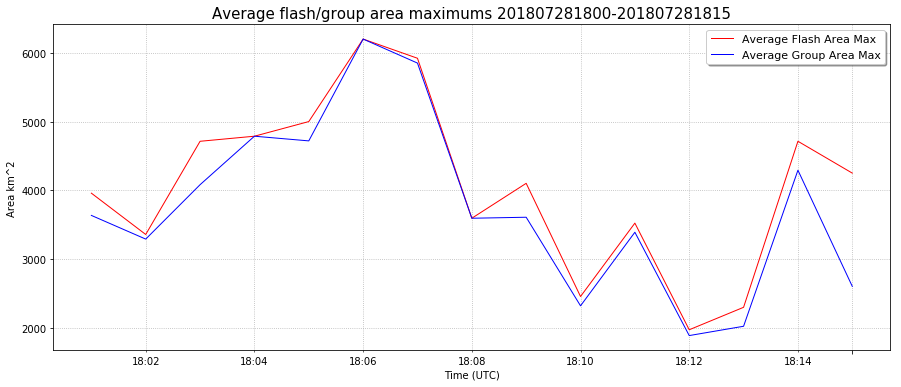

In [39]:
#Creating the time-series using the two data arrays
fig, ax1  = plt.subplots(1, 1, figsize=(15,6))
ax1.set_title('Average flash/group area maximums ' + start_start_time + '-' + end_end_time, fontsize=15)
flash_data_series.plot(color="r", linewidth=1.0, label='Average Flash Area Max', alpha=1)
group_data_series.plot(color="b", linewidth=1.0, label='Average Group Area Max', alpha=1)
ax1.grid(True, linestyle=':', which='major')
ax1.grid(True, linestyle=':', which='minor')
ax1.set_ylabel('Area km^2')
ax1.set_xlabel('Time (UTC)')
ax1.legend(loc='upper right', fontsize=11, shadow=True)
#ax1.set_xlim(pd.Timestamp(start_date + start_time), pd.Timestamp(end_date + end_time))
plt.show()

In [24]:
#Creating the bounds the color bar
bounds = np.arange(0, 8000, 1000)
print (bounds)

[   0 1000 2000 3000 4000 5000 6000 7000]


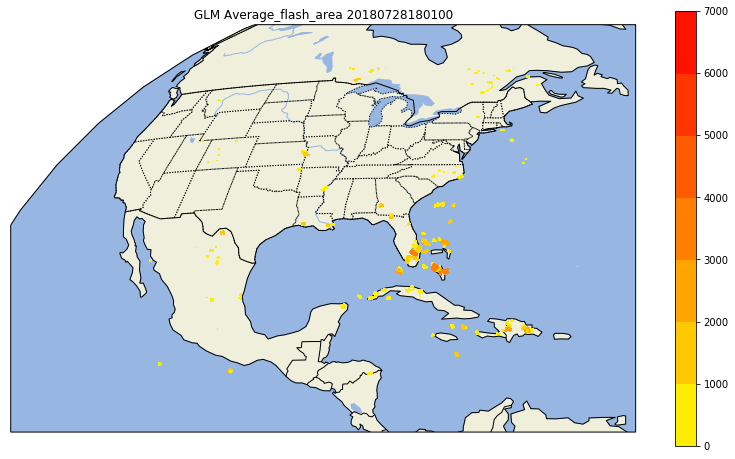

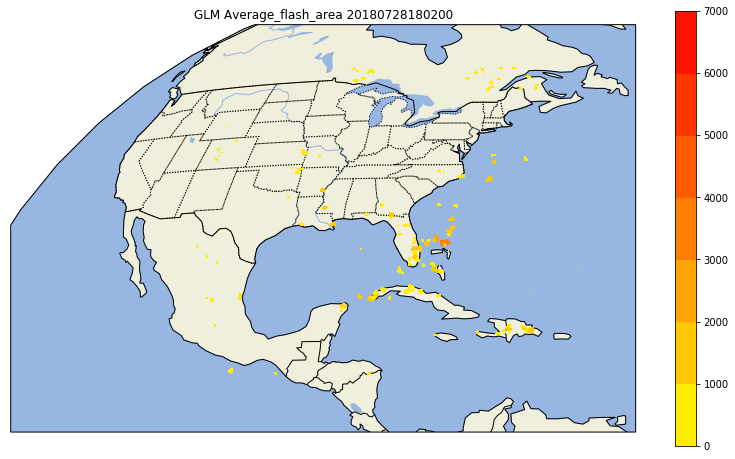

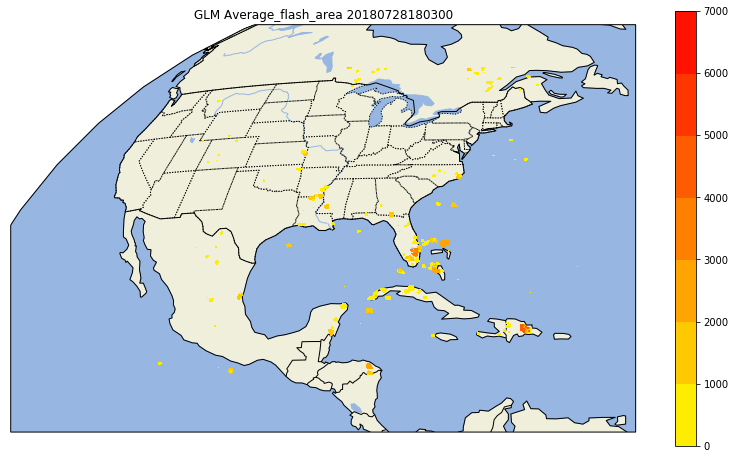

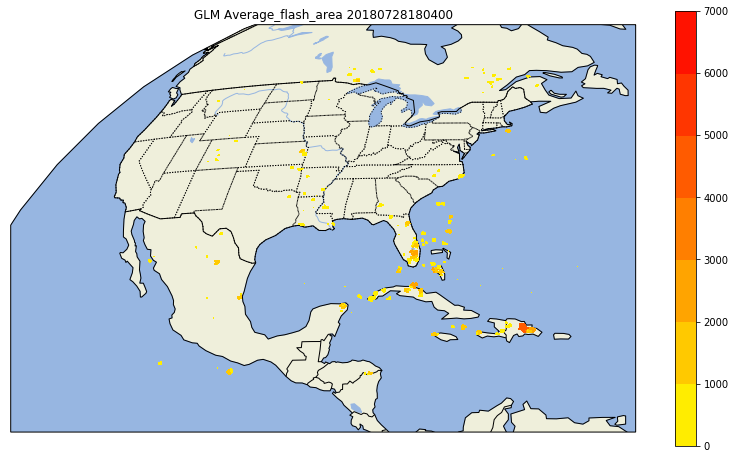

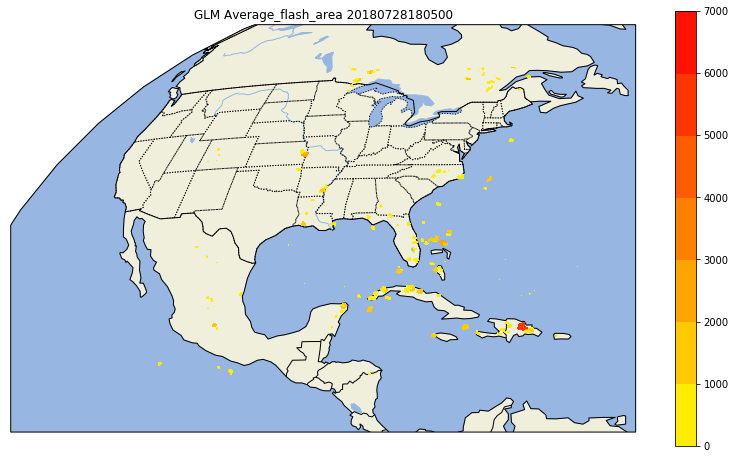

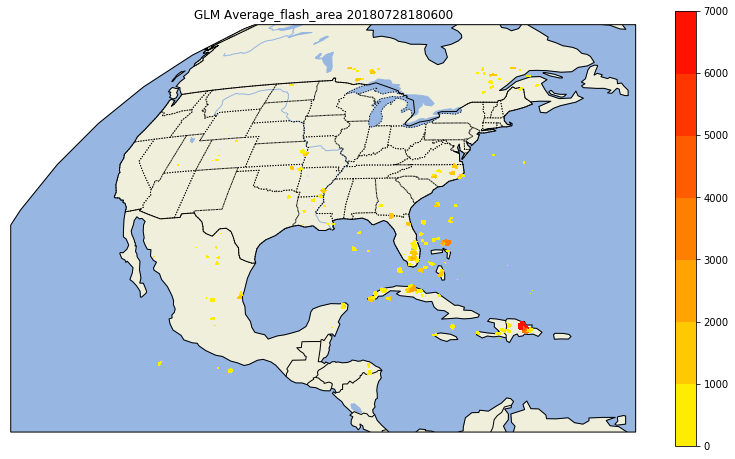

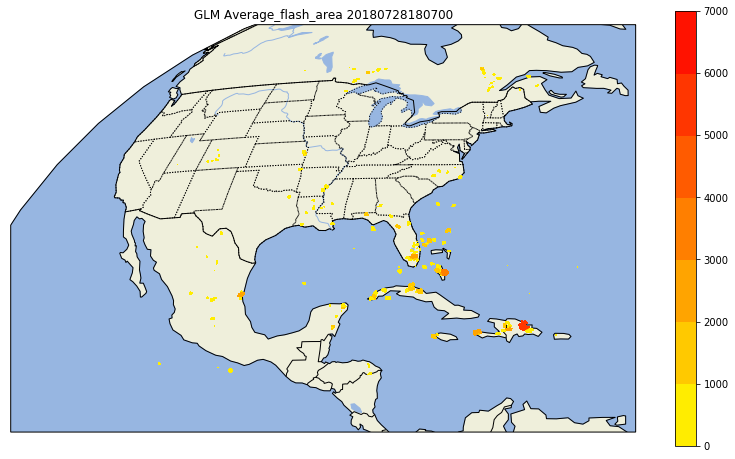

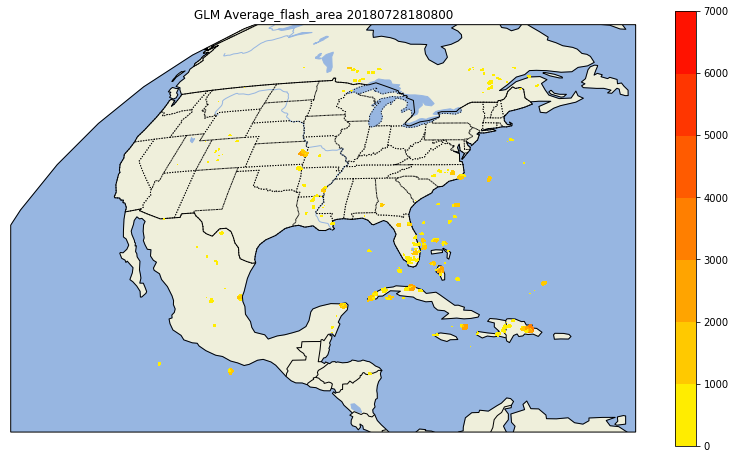

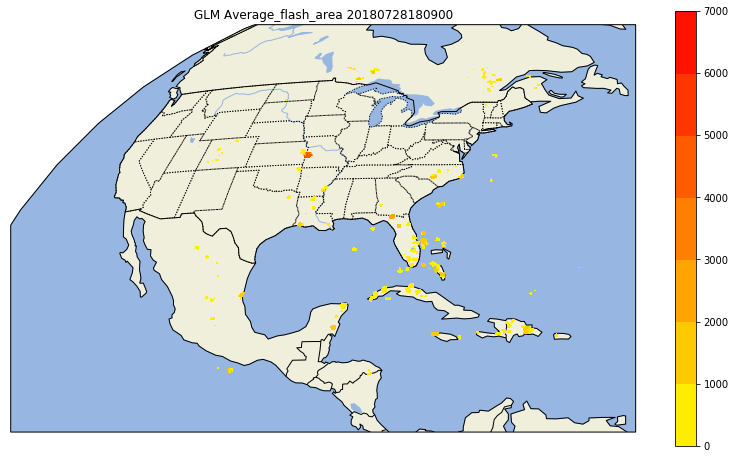

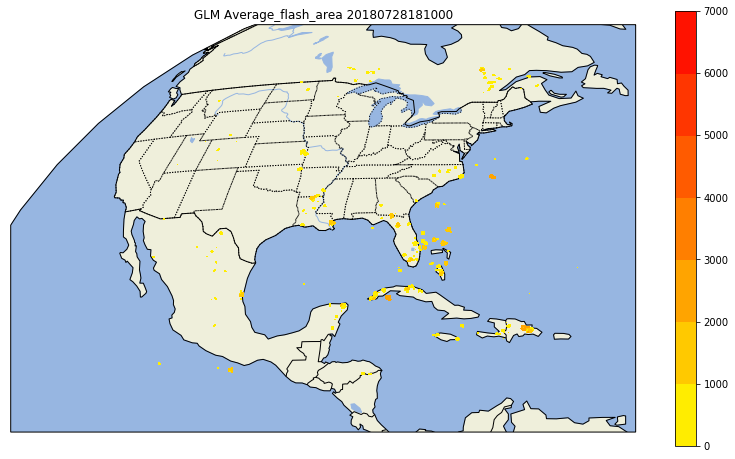

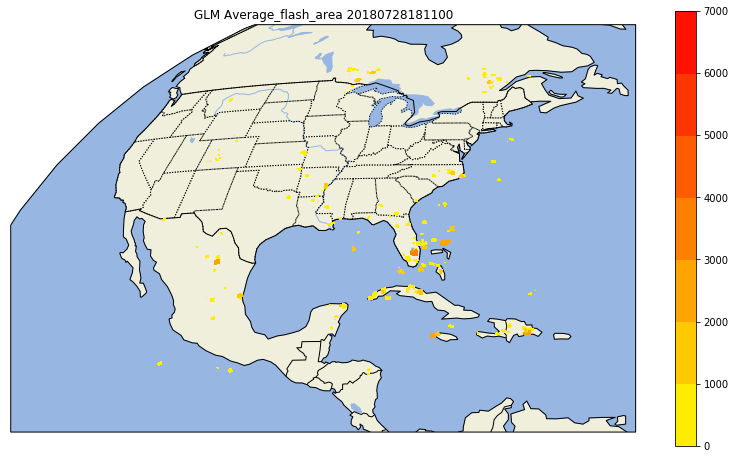

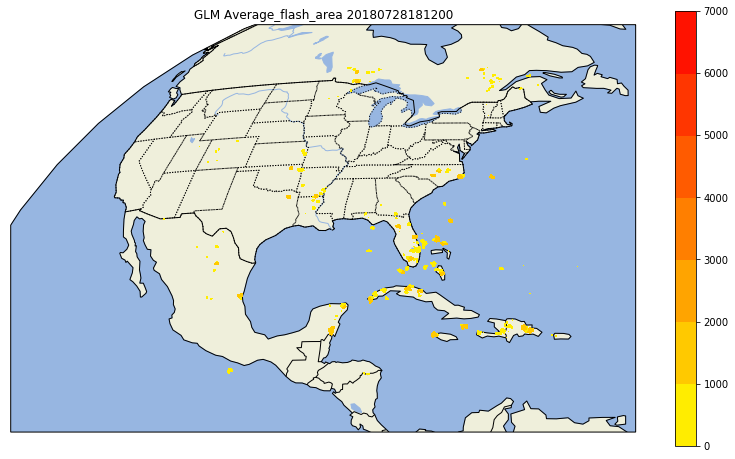

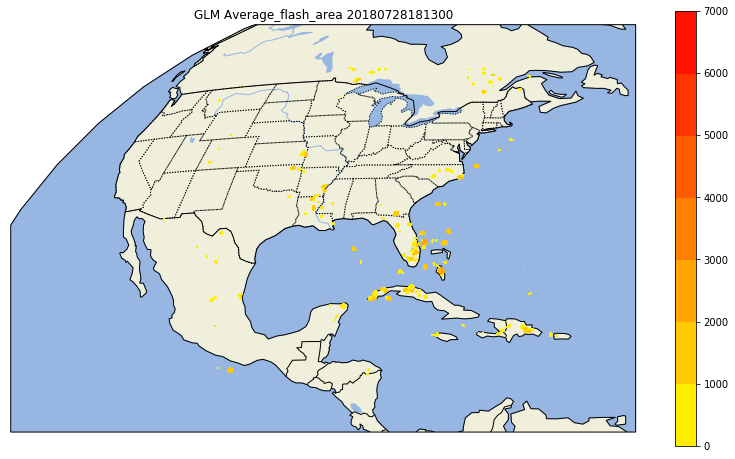

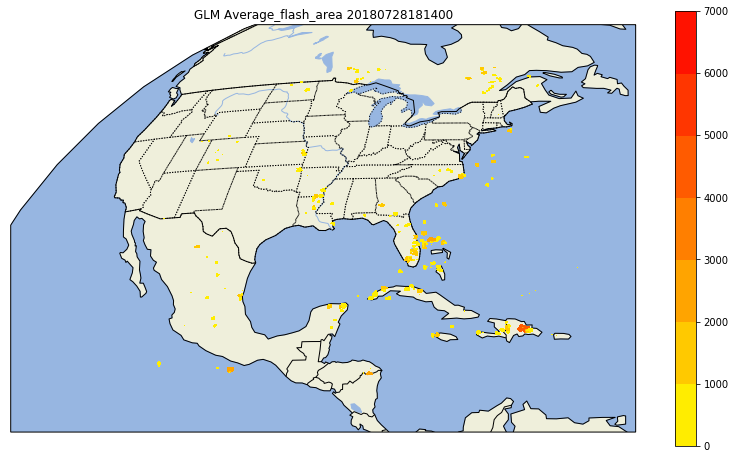

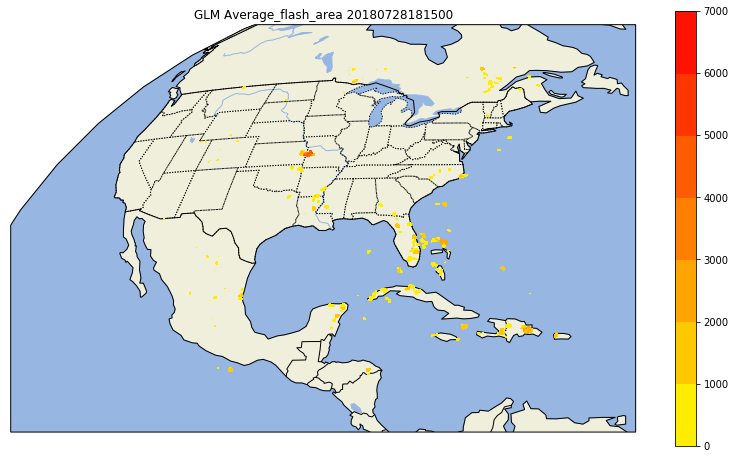

In [28]:
#A loop to create multiple GLM images
m = 0
length = len(end_time)

while m < 15:
    nc_file = nc.Dataset(file_names[m],'r')
    Average_flash_area = nc_file.variables['Average_flash_area'][::1]
    x = nc_file.variables['x'][:]
    y = nc_file.variables['y'][:]
    
    #creating plot with all the features
    plt.figure(figsize=(14, 8))
    ax = plt.axes(projection=ccrs.Geostationary(-75, 35786023.0))
    ax.set_extent([-125, -60, 10, 60])
    plt.contourf(x * 35786023.0, y * 35786023.0, Average_flash_area, levels=bounds, cmap=plt.get_cmap('autumn_r'), zorder=10)
    plt.title('GLM Average_flash_area ' + end_time[m])
    ax.coastlines(resolution='110m')
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.STATES, zorder=8, linestyle=':')
    ax.add_feature(cfeature.BORDERS, zorder=9)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.RIVERS)
    
    we = plt.colorbar()
    #plt.savefig("GIF3/Avg_flash_area" + end_time[m] + '.png', orientation="landscape", format="png")
    
    m += 1
